In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as ss
import itertools
from scipy import linalg
import matplotlib as mpl

#Reading in the data as a Pandas dataframe
df = pd.read_csv("gdrive/My Drive/Colab Notebooks/wine.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Target                  178 non-null int64
Alcohol                 178 non-null float64
Malic acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity of ash       178 non-null float64
Magnesium               178 non-null int64
Total phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color intensity         178 non-null float64
Hue                     178 non-null float64
OD280/OD315             178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.shape

(178, 14)

first 10 rows

In [5]:
df.head(10)

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [6]:
df.describe()

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


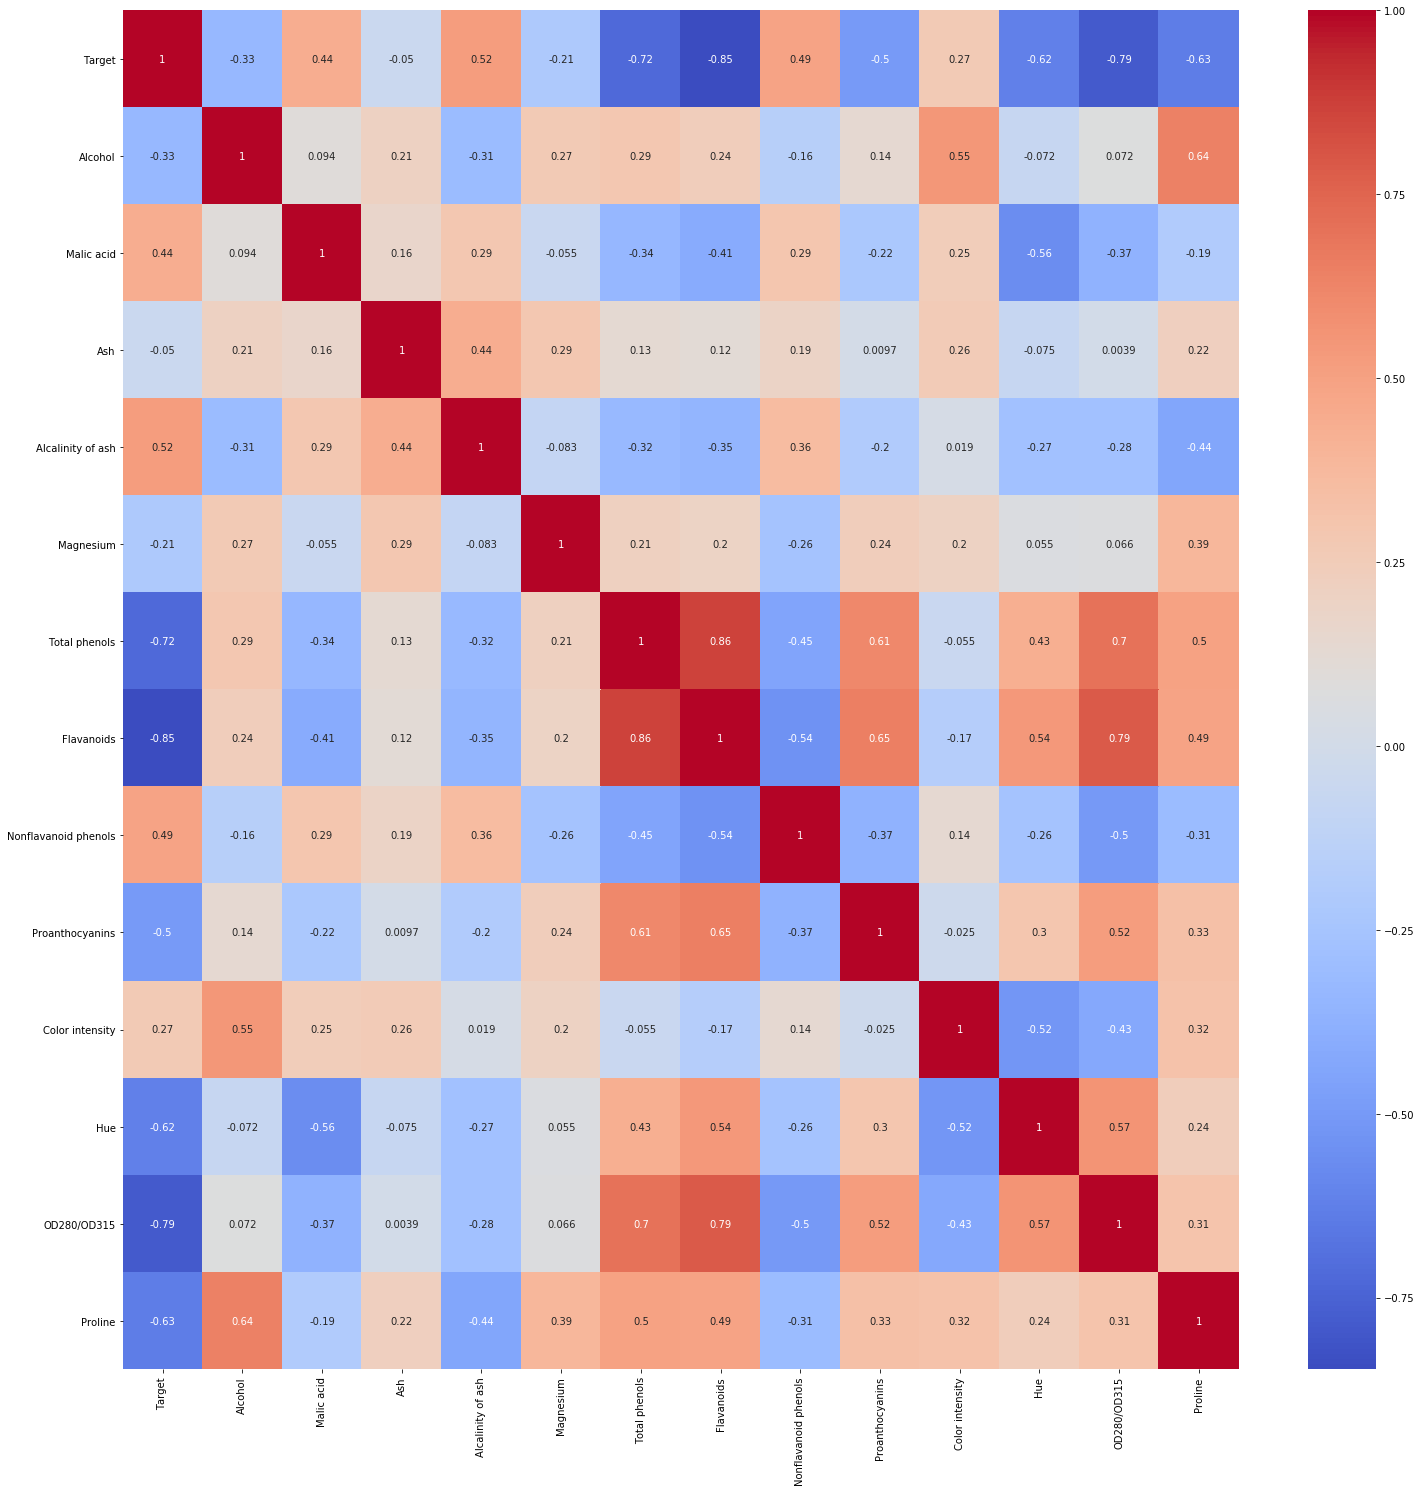

In [7]:
correlation=df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [8]:
# split into training and testing datasets
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3,stratify=y, random_state=0)
print(X_train)
print(y_train)

[[1.362e+01 4.950e+00 2.350e+00 ... 9.100e-01 2.050e+00 5.500e+02]
 [1.376e+01 1.530e+00 2.700e+00 ... 1.250e+00 3.000e+00 1.235e+03]
 [1.373e+01 1.500e+00 2.700e+00 ... 1.190e+00 2.710e+00 1.285e+03]
 ...
 [1.388e+01 5.040e+00 2.230e+00 ... 5.800e-01 1.330e+00 4.150e+02]
 [1.196e+01 1.090e+00 2.300e+00 ... 9.900e-01 3.130e+00 8.860e+02]
 [1.270e+01 3.870e+00 2.400e+00 ... 1.190e+00 3.130e+00 4.630e+02]]
[3 1 1 1 3 2 2 3 2 2 2 1 2 3 1 3 2 1 3 3 2 1 2 2 2 2 3 1 2 2 1 1 3 1 2 1 1
 2 3 3 1 3 3 3 1 2 3 3 2 3 2 2 2 1 2 2 3 3 2 1 1 2 3 3 2 1 2 2 2 1 1 1 1 1
 3 1 2 3 2 2 3 1 2 1 2 2 3 2 1 1 1 3 2 1 1 2 2 3 3 2 1 1 2 2 3 1 3 1 2 2 2
 2 1 3 1 1 1 1 2 2 3 3 2 2]


In [0]:
# standardize the features
sc = ss()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

GMM

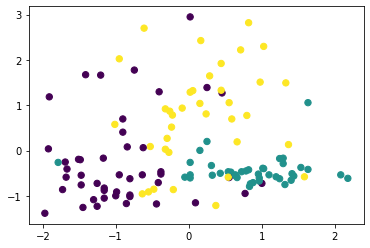

In [10]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=3).fit(X_train_std)
labels = gmm.predict(X_train_std)
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=labels, s=40, cmap='viridis');

But because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments—in Scikit-Learn this is done using the ``predict_proba`` method.
This returns a matrix of size ``[n_samples, n_clusters]`` which measures the probability that any point belongs to the given cluster:

In [11]:
probs = gmm.predict_proba(X_train_std)
print(probs[:20].round(3))

[[0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.001 0.    0.999]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]]


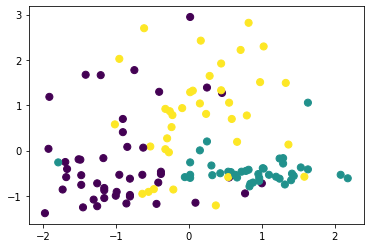

In [12]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=labels, cmap='viridis', s=size);

Function

In [0]:
from matplotlib.patches import Ellipse
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')
        


In [0]:
n_classes=3
# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}
n_estimators = len(estimators)

In [15]:
estimators 

{'diag': GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                 means_init=None, n_components=3, n_init=1, precisions_init=None,
                 random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                 verbose_interval=10, warm_start=False, weights_init=None),
 'full': GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                 means_init=None, n_components=3, n_init=1, precisions_init=None,
                 random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                 verbose_interval=10, warm_start=False, weights_init=None),
 'spherical': GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                 means_init=None, n_components=3, n_init=1, precisions_init=None,
                 random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                 verbose_interval=10, warm_start=False, weights_init=None),
 'tied': GaussianMixture(covariance_

In [17]:
X_train_std

array([[ 0.71225893,  2.22048673, -0.13025864, ..., -0.20017028,
        -0.82164144, -0.62946362],
       [ 0.88229214, -0.70457155,  1.17533605, ...,  1.33982592,
         0.54931269,  1.47568796],
       [ 0.84585645, -0.73022996,  1.17533605, ...,  1.06806189,
         0.1308109 ,  1.62934866],
       ...,
       [ 1.02803489,  2.29746195, -0.5778911 , ..., -1.69487249,
        -1.86068037, -1.04434751],
       [-1.30384913, -1.08089484, -0.31677217, ...,  0.16218176,
         0.73691694,  0.40313628],
       [-0.40510216,  1.29678411,  0.05625489, ...,  1.06806189,
         0.73691694, -0.89683324]])

No handles with labels found to put in legend.


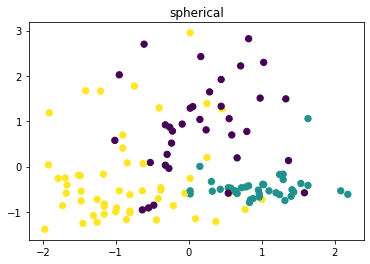

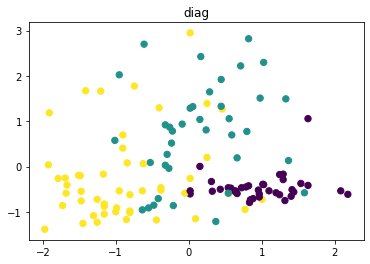

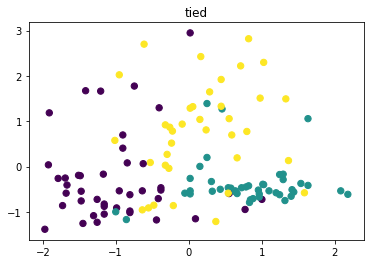

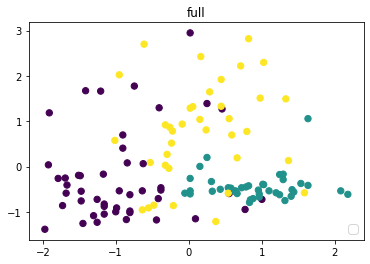

In [38]:
for index, (name, estimator) in enumerate(estimators.items()):
    # Train the other parameters using the EM algorithm.
    gmm=estimator.fit(X_train_std)
    labels = gmm.predict(X_train_std)
    plt.figure()
    
    plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=labels, s=40, cmap='viridis');
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

K-means

In [0]:
from sklearn.cluster import KMeans
from numpy import *
import matplotlib

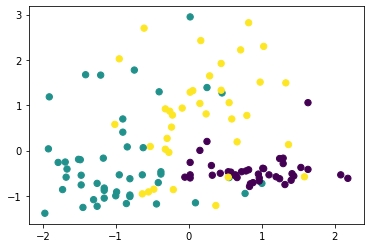

In [42]:
# Plot the data with K Means Labels
kmeans = KMeans(3, random_state=0)
labels = kmeans.fit(X_train_std).predict(X_train_std)
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=labels, s=40, cmap='viridis');

In [0]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X_train_std, n_clusters=3, rseed=0, ax=None):
    labels = kmeans.fit_predict(X_train_std)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X_train_std[:, 0], X_train_std[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X_train_std[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

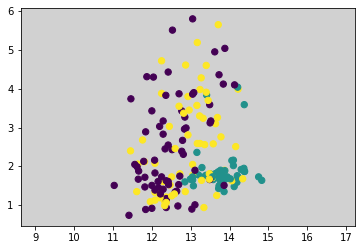

In [44]:
kmeans = KMeans(n_clusters=3, random_state=0)
plot_kmeans(kmeans, X)